In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Tracking

In [ ]:
tracking2018 = pd.read_csv('/content/drive/MyDrive/NEU/Kaggle/tracking2018.csv')
tracking2018.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right


In [ ]:
tracking2018.isnull().sum()

time                  0
x                     0
y                     0
s                     0
a                     0
dis                   0
o                555537
dir              555537
event                 0
nflId            555537
displayName           0
jerseyNumber     555537
position         555537
team                  0
frameId               0
gameId                0
playId                0
playDirection         0
dtype: int64

In [ ]:
# Dropna
reduce2018 = tracking2018.dropna()
reduce2018['nflId'].unique()

array([39470., 40579., 41316., ..., 43495., 39750., 41336.])

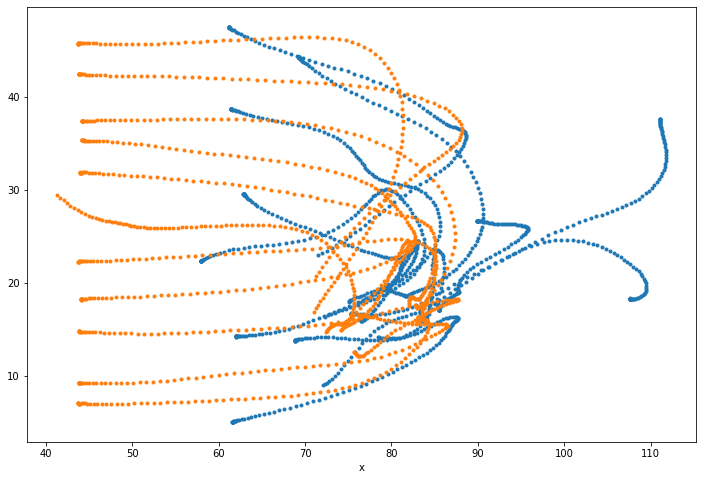

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
reduce2018.query('gameId == 2018123000 and playId == 36').groupby('team') \
    .plot(x='x', y='y', ax=ax, style='.')
plt.legend().remove();

# Analysis of Play Type

In [ ]:
plays = pd.read_csv('/content/drive/MyDrive/NEU/Kaggle/plays.csv')
plays.isnull().sum()

gameId                        0
playId                        0
playDescription               0
quarter                       0
down                          0
yardsToGo                     0
possessionTeam                0
specialTeamsPlayType          0
specialTeamsResult            0
kickerId                    101
returnerId                13041
kickBlockerId             19879
yardlineSide                166
yardlineNumber                0
gameClock                     0
penaltyCodes              18877
penaltyJerseyNumbers      18877
penaltyYards              18877
preSnapHomeScore              0
preSnapVisitorScore           0
passResult                19934
kickLength                 3652
kickReturnYardage         14655
playResult                    0
absoluteYardlineNumber        0
dtype: int64

In [ ]:
plays.groupby('specialTeamsPlayType').size()

specialTeamsPlayType
Extra Point    3488
Field Goal     2657
Kickoff        7843
Punt           5991
dtype: int64

In [ ]:
plays.groupby('specialTeamsResult').size()

specialTeamsResult
Blocked Kick Attempt          61
Blocked Punt                  39
Downed                       834
Fair Catch                  1645
Kick Attempt Good           5470
Kick Attempt No Good         585
Kickoff Team Recovery         16
Muffed                       214
Non-Special Teams Result     101
Out of Bounds                651
Return                      5207
Touchback                   5156
dtype: int64

https://www.ducksters.com/sports/football/special_teams.php

# Kickoff (begin of game)

- Occur at start of each half game and if exist, the extra time 
- Kicker: Position ball for kick (round the 35-yard line) -> line up to kick (roughly 15 yards) -> Kick the ball down the field 
- Others (roughly 10 yards behind)
- The other team (Kickoff return) will be 2 players lined up deep down the field whose job is to catch the kick and return the ball as far as possible. line up in three distinct levels.：
    1. bigger players 10 yards off the ball
    2. five players will line up with two on each side of the hash marks and one in the middle of the field. blocker
    3. four players will line up about 20 yards behind the first line. more mobile and agile players, also blocker

In [ ]:
df_kick = plays.query('specialTeamsPlayType == "Kickoff"').reset_index()
print("Kickoff Result: ", df_kick['specialTeamsResult'].unique())

Kickoff Result:  ['Touchback' 'Return' 'Muffed' 'Kickoff Team Recovery' 'Out of Bounds'
 'Fair Catch' 'Downed']


In [ ]:
df_kick.isnull().sum()

gameId                       0
playId                       0
playDescription              0
quarter                      0
down                         0
yardsToGo                    0
possessionTeam               0
specialTeamsPlayType         0
specialTeamsResult           0
kickerId                     0
returnerId                4985
kickBlockerId             7843
yardlineSide                57
yardlineNumber               0
gameClock                    0
penaltyCodes              7487
penaltyJerseyNumbers      7487
penaltyYards              7487
preSnapHomeScore             0
preSnapVisitorScore          0
passResult                7843
kickLength                   0
kickReturnYardage         4874
playResult                   0
absoluteYardlineNumber       0
dtype: int64

In [ ]:
df.head(3)

,level_0,index,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,0,0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,15:00:00,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,1,3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,44979,NaN,ATL,35,05:01:00,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
2,2,7,2018090600,1387,J.Elliott kicks 65 yards from PHI 35 to end zo...,2,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,06:09:00,NaN,NaN,NaN,3,3,NaN,72.0,NaN,40,75


In [ ]:
# Unique kicker in each play which special team perform kickoff
k_kicker = df_kick['kickerId'].unique()
k_kicker.sort()
print("Kickoff Kicker: ", k_kicker)

Kickoff Kicker:  [23860. 25326. 27091. 29141. 29874. 29926. 30403. 30932. 31446. 32371.
 32386. 33338. 33469. 34615. 34707. 34723. 35102. 37267. 38134. 38138.
 38220. 38600. 38691. 38701. 38815. 38897. 39470. 40113. 40114. 40125.
 40248. 40276. 40775. 41112. 41175. 41420. 41688. 41736. 41953. 41991.
 42098. 42133. 42333. 42508. 42663. 42907. 43068. 43517. 43524. 43689.
 43846. 43902. 43937. 44240. 44966. 45037. 45046. 45153. 45296. 45555.
 45576. 45603. 46218. 46236. 46241. 46298. 46316. 46342. 46426. 46455.
 46634. 46663. 46832. 46903. 47423. 47590. 47893. 47928. 47946. 47953.
 48139. 48258. 48329. 48337. 48488. 52596. 52599. 52636. 52656. 52751.
 52791.]


In [ ]:
# Match the tracking data with kicker recorded in plays
match = reduce2018.nflId.isin(k_kicker)
new_df = reduce2018.loc[match, :]

In [ ]:
# Group the position tracking for each palyer in each play
# index[0] = gameId, index[1] = playId, index[2] = nflId, index[3] = time
new_df_copy = new_df.set_index(['gameId','playId','nflId','time'])
new_df_copy = new_df_copy.drop(['s','a','dis','o','dir','displayName','jerseyNumber','position','frameId'], axis=1)
new_df_copy.sort_index()
new_df_copy

x  ...  playDirection
gameId     playId nflId   time                            ...               
2018123000 36     39470.0 2018-12-30T21:25:32.200  41.32  ...          right
                          2018-12-30T21:25:32.300  41.68  ...          right
                          2018-12-30T21:25:32.400  42.05  ...          right
                          2018-12-30T21:25:32.500  42.43  ...          right
                          2018-12-30T21:25:32.600  42.84  ...          right
...                                                  ...  ...            ...
2018091001 4033   38701.0 2018-09-11T05:25:17.800  63.75  ...          right
                          2018-09-11T05:25:17.900  64.08  ...          right
                          2018-09-11T05:25:18.000  64.39  ...          right
                          2018-09-11T05:25:18.100  64.71  ...          right
                          2018-09-11T05:25:18.200  65.03  ...          right

[617855 rows x 5 columns]

In [ ]:
# Drop the column which will not influence the initial position or which is the next action
#new_df = new_df.drop(['s','a','dis','o','dir','displayName','jerseyNumber','position','frameId'], axis=1)
new_df = new_df.sort_values(by=['gameId','time']).reset_index()
new_df.head(3)

,index,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,12070078,2018-09-07T01:05:25.800,40.82,30.39,3.71,1.87,0.36,118.90,122.36,None,44966.0,Jake Elliott,4.0,K,home,1,2018090600,37,right
1,12070079,2018-09-07T01:05:25.900,41.14,30.18,3.91,1.50,0.38,116.28,122.66,None,44966.0,Jake Elliott,4.0,K,home,2,2018090600,37,right
2,12070080,2018-09-07T01:05:26.000,41.49,29.96,4.20,1.42,0.42,121.45,122.54,None,44966.0,Jake Elliott,4.0,K,home,3,2018090600,37,right


In [ ]:
# To get kicker's initial position, combine index[0:3] to filter
K_initial = []
K_initial.append(new_df.iloc[0,:])
temp = new_df.loc[0, ['gameId', 'playId','nflId']].values
for i in range(len(new_df)):
    if new_df.loc[i, ['gameId', 'playId','nflId']].values.all() != temp.all():
        K_initial.append(new_df.iloc[i,:])
        temp = new_df.loc[i, ['gameId', 'playId','nflId']]

In [ ]:
K_initial = pd.DataFrame(K_initial)
K_initial

,index,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,12070078,2018-09-07T01:05:25.800,40.82,30.39,3.71,1.87,0.36,118.90,122.36,None,44966.0,Jake Elliott,4.0,K,home,1,2018090600,37,right
69,12073082,2018-09-07T01:18:14.000,4.19,31.01,0.00,0.00,0.00,104.71,63.82,None,45603.0,Cameron Johnston,1.0,P,home,1,2018090600,366,right
70,12073083,2018-09-07T01:18:14.100,4.19,31.01,0.00,0.00,0.00,104.71,64.16,None,45603.0,Cameron Johnston,1.0,P,home,2,2018090600,366,right
71,12073084,2018-09-07T01:18:14.200,4.20,31.01,0.00,0.00,0.00,104.06,66.73,None,45603.0,Cameron Johnston,1.0,P,home,3,2018090600,366,right
72,12073085,2018-09-07T01:18:14.300,4.20,31.01,0.00,0.00,0.00,104.06,70.63,None,45603.0,Cameron Johnston,1.0,P,home,4,2018090600,366,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617850,789816,2018-12-31T00:28:12.700,87.71,26.14,2.83,1.81,0.27,160.69,131.85,None,46218.0,Michael Dickson,4.0,P,home,52,2018123015,4260,right
617851,788791,2018-12-31T00:28:12.800,89.52,24.65,0.78,0.41,0.08,156.73,154.88,None,25326.0,Sebastian Janikowski,11.0,K,home,53,2018123015,4260,right
617852,789817,2018-12-31T00:28:12.800,87.92,25.95,2.97,1.29,0.29,161.93,131.77,None,46218.0,Michael Dickson,4.0,P,home,53,2018123015,4260,right
617853,788792,2018-12-31T00:28:12.900,89.55,24.57,0.80,0.36,0.08,162.13,157.16,None,25326.0,Sebastian Janikowski,11.0,K,home,54,2018123015,4260,right


# Punt (on 4th down, after offense fails to convert a 1st down)

- After the snap, the punt both specialists become active in tackling the opposing punt returner
- Usually 50-yard line and back toward the offense team’s zone
- seven players at the line of scrimmage
    1. center (or long snapper) will line up over the ball, with a guard and tackle on each side two yards apart.
    2. other two players on the line of scrimmage will spread out a little more, about three yards out.
- Punter: line up about 15 yards behind the long snapper, either as far as possible or angle the ball toward one of the sidelines
- Long Snapper: set his feet, take one step forward and then punt the ball down the field.
- The other team (punt return) will be 2 players lined up deep down the field whose job is same as kickoff return
    1. No one can be lined up on the line of scrimmage over the center
    2. One linemen will line up directly opposite the long snapper.
    3. three players on each side of the long snapper will line up stacked close to each other over the guards and tackles.
    4. Two cornerbacks will line up across from the outside protectors, while the returner will line up deep to catch the kick.
- At the snap, if the return team has called a protection play, each player will be responsible for picking up a player on the other team and blocking him.
- If a punt block has been called, some of these players will try to rush through the line of scrimmage to get to the punter before he can kick the ball away.

In [ ]:
df_punt = plays.query('specialTeamsPlayType == "Punt"')
print("Punt Result: ", df_punt['specialTeamsResult'].unique())

Punt Result:  ['Return' 'Touchback' 'Fair Catch' 'Downed' 'Muffed' 'Out of Bounds'
 'Non-Special Teams Result' 'Blocked Punt']


In [ ]:
df_punt.isnull().sum()

gameId                       0
playId                       0
playDescription              0
quarter                      0
down                         0
yardsToGo                    0
possessionTeam               0
specialTeamsPlayType         0
specialTeamsResult           0
kickerId                    74
returnerId                1913
kickBlockerId             5952
yardlineSide               109
yardlineNumber               0
gameClock                    0
penaltyCodes              5350
penaltyJerseyNumbers      5350
penaltyYards              5350
preSnapHomeScore             0
preSnapVisitorScore          0
passResult                5960
kickLength                 113
kickReturnYardage         3636
playResult                   0
absoluteYardlineNumber       0
dtype: int64

In [ ]:
p_kicker = df_punt['kickerId'].unique()
p_kicker.sort()
print("Punt Kicker: ", p_kicker)

Punt Kicker:  [29141. 29177. 29926. 31018. 33338. 34593. 34615. 34723. 37267. 38138.
 38600. 38815. 39113. 40113. 40437. 40600. 40946. 41420. 42098. 42133.
 42333. 42508. 42663. 42747. 42907. 43468. 43517. 43524. 43937. 44966.
 45037. 45153. 45296. 45603. 45986. 46218. 46241. 46242. 46316. 46790.
 46810. 46903. 47893. 47946. 47953. 48139. 48258. 48335. 50975. 52599.
 52636. 52791. 53146.    nan]


In [ ]:
# Match the tracking data with kicker recorded in plays
match = reduce2018.nflId.isin(p_kicker)
new_df = reduce2018.loc[match, :]

In [ ]:
# Group the position tracking for each palyer in each play
# index[0] = gameId, index[1] = playId, index[2] = nflId, index[3] = time
new_df_copy = new_df.set_index(['gameId','playId','nflId','time'])
new_df_copy = new_df_copy.drop(['s','a','dis','o','dir','displayName','jerseyNumber','position','frameId'], axis=1)
new_df_copy.sort_index()
new_df_copy

x  ...  playDirection
gameId     playId nflId   time                            ...               
2018123000 373    31018.0 2018-12-30T21:35:00.300  81.81  ...          right
                          2018-12-30T21:35:00.400  81.81  ...          right
                          2018-12-30T21:35:00.500  81.81  ...          right
                          2018-12-30T21:35:00.600  81.81  ...          right
                          2018-12-30T21:35:00.700  81.81  ...          right
...                                                  ...  ...            ...
2018091001 4002   38815.0 2018-09-11T05:22:17.100  86.90  ...          right
                          2018-09-11T05:22:17.200  86.90  ...          right
                          2018-09-11T05:22:17.300  86.89  ...          right
                          2018-09-11T05:22:17.400  86.89  ...          right
                          2018-09-11T05:22:17.500  86.89  ...          right

[399938 rows x 5 columns]

In [ ]:
# Drop the column which will not influence the initial position or which is the next action
#new_df = new_df.drop(['s','a','dis','o','dir','displayName','jerseyNumber','position','frameId'], axis=1)
new_df = new_df.sort_values(by=['gameId','time']).reset_index()
new_df.head(3)

,index,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,12070078,2018-09-07T01:05:25.800,40.82,30.39,3.71,1.87,0.36,118.90,122.36,None,44966.0,Jake Elliott,4.0,K,home,1,2018090600,37,right
1,12070079,2018-09-07T01:05:25.900,41.14,30.18,3.91,1.50,0.38,116.28,122.66,None,44966.0,Jake Elliott,4.0,K,home,2,2018090600,37,right
2,12070080,2018-09-07T01:05:26.000,41.49,29.96,4.20,1.42,0.42,121.45,122.54,None,44966.0,Jake Elliott,4.0,K,home,3,2018090600,37,right


In [ ]:
# To get kicker's initial position, combine index[0:3] to filter
P_initial = []
P_initial.append(new_df.iloc[0,:])
temp = new_df.loc[0, ['gameId', 'playId','nflId']].values
for i in range(len(new_df)):
    if new_df.loc[i, ['gameId', 'playId','nflId']].values.all() != temp.all():
        P_initial.append(new_df.iloc[i,:])
        temp = new_df.loc[i, ['gameId', 'playId','nflId']]

In [ ]:
P_initial = pd.DataFrame(P_initial)
P_initial.to_csv('C:\\Users\\kaitl\\OneDrive\\Desktop\\DM\\project\\P_initial.csv')
df_punt.to_csv('C:\\Users\\kaitl\\OneDrive\\Desktop\\DM\\project\\df_punt.csv')

# Field Goal and Extra point 

- Field Goal
    1. the ball needs to be at the 35- to 40-yard line or closer.
    2. most commonly attempted on fourth down, when the offense can’t convert a first down.
    3. The offense will attempt a field goal instead of a punt if the offense got the ball close enough to the end zone
- Line up same way for both 
    1. kicking team
        - seven players at the line of scrimmage
        - long snapper lines up over the ball, with three players on each side of him.
        - two wing backs on each side of the field, lined up a few yards in the backfield and on a diagonal from the players at the end of the line of scrimmage.
        - Holder: even yards behind the long snapper
        - kicker: will line up a few yards behind the holder, on a slight diagonal from him.
     2. kick return team (jump as high as possible)
         - Ten of the 11 players on that team will line up at the line of scrimmage
         - almost in a straight line spread out wide.
         - The other player will line up behind them, shaded to one shoulder of the long snapper.
         - At the snap, the 10 players at the line of scrimmage will attempt to break through the line
         - The two outside defenders will take a wide angle to try to get around the wing backs.

In [ ]:
df_FG = plays.query('specialTeamsPlayType == "Field Goal"')
print("Field Goal: ", df_FG['specialTeamsResult'].unique())
df_extra = plays.query('specialTeamsPlayType == "Extra Point"')
print("Extra Point: ", df_extra['specialTeamsResult'].unique())

Field Goal:  ['Kick Attempt Good' 'Kick Attempt No Good' 'Blocked Kick Attempt'
 'Non-Special Teams Result' 'Out of Bounds' 'Downed']
Extra Point:  ['Kick Attempt Good' 'Kick Attempt No Good' 'Non-Special Teams Result'
 'Blocked Kick Attempt']


In [ ]:
df_FG.isnull().sum()

gameId                       0
playId                       0
playDescription              0
quarter                      0
down                         0
yardsToGo                    0
possessionTeam               0
specialTeamsPlayType         0
specialTeamsResult           0
kickerId                    14
returnerId                2655
kickBlockerId             2620
yardlineSide                 0
yardlineNumber               0
gameClock                    0
penaltyCodes              2617
penaltyJerseyNumbers      2617
penaltyYards              2617
preSnapHomeScore             0
preSnapVisitorScore          0
passResult                2647
kickLength                  51
kickReturnYardage         2657
playResult                   0
absoluteYardlineNumber       0
dtype: int64

In [ ]:
df_extra.isnull().sum()

gameId                       0
playId                       0
playDescription              0
quarter                      0
down                         0
yardsToGo                    0
possessionTeam               0
specialTeamsPlayType         0
specialTeamsResult           0
kickerId                    13
returnerId                3488
kickBlockerId             3464
yardlineSide                 0
yardlineNumber               0
gameClock                    0
penaltyCodes              3423
penaltyJerseyNumbers      3423
penaltyYards              3423
preSnapHomeScore             0
preSnapVisitorScore          0
passResult                3484
kickLength                3488
kickReturnYardage         3488
playResult                   0
absoluteYardlineNumber       0
dtype: int64

In [ ]:
 df_FE = pd.concat([df_FG, df_extra])
 df_FE.head(3)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,NaN,NaN,PHI,3,05:03:00,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
6,2018090600,1368,"(6:12) J.Elliott 26 yard field goal is GOOD, C...",2,4,8,PHI,Field Goal,Kick Attempt Good,44966.0,NaN,NaN,ATL,8,06:12:00,NaN,NaN,NaN,0,3,NaN,26.0,NaN,0,18
8,2018090600,1587,"(2:13) M.Bryant 52 yard field goal is GOOD, Ce...",2,4,17,ATL,Field Goal,Kick Attempt Good,27091.0,NaN,NaN,PHI,34,02:13:00,NaN,NaN,NaN,3,3,NaN,52.0,NaN,0,76


In [ ]:
fe_kicker = df_FE['kickerId'].unique()
fe_kicker.sort()
print("Field Goal and Extra Point Kicker: ", fe_kicker)

Field Goal and Extra Point Kicker:  [21213. 23860. 25326. 27091. 29874. 30403. 30932. 31446. 32371. 32386.
 33469. 34707. 35102. 38134. 38220. 38691. 38701. 38815. 38851. 39470.
 40114. 40125. 40276. 40775. 41112. 41175. 41688. 41736. 41953. 41991.
 42112. 42663. 43068. 43689. 43846. 43902. 43937. 44240. 44966. 45037.
 45046. 45576. 46236. 46298. 46342. 46426. 46455. 46634. 46663. 47423.
 47590. 47928. 47953. 48329. 48337. 48488. 52596. 52656. 52735. 52751.
    nan]


In [ ]:
# Match the tracking data with kicker recorded in plays
match = reduce2018.nflId.isin(fe_kicker)
new_df = reduce2018.loc[match, :]

In [ ]:
# Group the position tracking for each palyer in each play
# index[0] = gameId, index[1] = playId, index[2] = nflId, index[3] = time
new_df_copy = new_df.set_index(['gameId','playId','nflId','time'])
new_df_copy = new_df_copy.drop(['s','a','dis','o','dir','displayName','jerseyNumber','position','frameId'], axis=1)
new_df_copy.sort_index()
new_df_copy

In [ ]:
# Drop the column which will not influence the initial position or which is the next action
#new_df = new_df.drop(['s','a','dis','o','dir','displayName','jerseyNumber','position','frameId'], axis=1)
new_df = new_df.sort_values(by=['gameId','time']).reset_index()
new_df.head(3)

,index,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,12070078,2018-09-07T01:05:25.800,40.82,30.39,3.71,1.87,0.36,118.90,122.36,None,44966.0,Jake Elliott,4.0,K,home,1,2018090600,37,right
1,12070079,2018-09-07T01:05:25.900,41.14,30.18,3.91,1.50,0.38,116.28,122.66,None,44966.0,Jake Elliott,4.0,K,home,2,2018090600,37,right
2,12070080,2018-09-07T01:05:26.000,41.49,29.96,4.20,1.42,0.42,121.45,122.54,None,44966.0,Jake Elliott,4.0,K,home,3,2018090600,37,right


In [ ]:
# To get kicker's initial position, combine index[0:3] to filter
FE_initial = []
FE_initial.append(new_df.iloc[0,:])
temp = new_df.loc[0, ['gameId', 'playId','nflId']].values
for i in range(len(new_df)):
    if new_df.loc[i, ['gameId', 'playId','nflId']].values.all() != temp.all():
        FE_initial.append(new_df.iloc[i,:])
        temp = new_df.loc[i, ['gameId', 'playId','nflId']]

In [ ]:
FE_initial = pd.DataFrame(FE_initial)
FE_initial.to_csv('C:\\Users\\kaitl\\OneDrive\\Desktop\\DM\\project\\FE_initial.csv')
df_FE.to_csv('C:\\Users\\kaitl\\OneDrive\\Desktop\\DM\\project\\df_FE.csv')